## Transfer Learning using CNNs

Quoting Andrew Karpathy: Dont reinvent the wheel

Transfer Learning must be used when the dataset to be evaluated is limited and not enought to train a CNN from scratch. Using pre trained CNN that where trained in large datasets may become useful.
VGG-19 is a pre-trained CNN with 19 layer network over the Imagenet.

Details about VGG-19 model architecture are available [HERE](https://arxiv.org/abs/1409.1556).

Other pre-trained models in Keras are available [HERE](https://keras.io/applications/#documentation-for-individual-models).

Another way of using pre-trained CNNs for transfer learning is to fine-tune CNNs by initializing network weights from a pre-trained network and then re-training the network with the new dataset.


## Import necessary modules

In [2]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"

In [3]:
# Import necessary modules
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(1234)

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import cv2

Using TensorFlow backend.


# Pre-trained model for image classification

In [6]:
# Load pre-trained model
model = VGG19(weights='imagenet', include_top=True)

# Quick display of the model layers
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

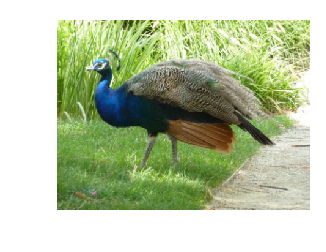

In [4]:
# Display the image to be classified
img_test = cv2.imread('./data/peacock.jpg')
img_test = cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)
plt.axis("off")  
plt.show()

In [9]:
# Test another image
img_test = image.load_img('./data/peacock.jpg', target_size=(224,224)) # Resize the image
img_test = image.img_to_array(img_test)
img_test = np.expand_dims(img_test, axis =0) # Convert to one dimension
img_test = preprocess_input(img_test)

# Predict the image class
preds = model.predict(img_test)

# Decode the prediction
preds_class = decode_predictions(preds, top =3)[0][0]
print("Predicted Class: %s"%preds_class[1])
print("Confidence of: %s"%preds_class[2])

# Test another image
img_test = image.load_img('./data/bus.jpg', target_size=(224,224)) # Resize the image
img_test = image.img_to_array(img_test)
img_test = np.expand_dims(img_test, axis =0) # Convert to one dimension
img_test = preprocess_input(img_test)

# Predict the image class
preds = model.predict(img_test)

# Decode the prediction
preds_class = decode_predictions(preds, top =3)[0][0]
print("Predicted Class: %s"%preds_class[1])
print("Confidence of: %s"%preds_class[2])

# Test another image
img_test = image.load_img('./data/ship1.jpg', target_size=(224,224)) # Resize the image
img_test = image.img_to_array(img_test)
img_test = np.expand_dims(img_test, axis =0) # Convert to one dimension
img_test = preprocess_input(img_test)

# Predict the image class
preds = model.predict(img_test)

# Decode the prediction
preds_class = decode_predictions(preds, top =3)[0][0]
print("Predicted Class: %s"%preds_class[1])
print("Confidence of: %s"%preds_class[2])

Predicted Class: peacock
Confidence of: 0.999985
Predicted Class: passenger_car
Confidence of: 0.655932
Predicted Class: submarine
Confidence of: 0.242166


## Pre-trained model as a feature extractor

In [ ]:
# Load pre-trained model
model_base = VGG19(weights='imagenet')

# Pre process the image
img_test = image.load_img('./data/peacock.jpg', target_size=(224,224)) # Resize the image
img_test = image.img_to_array(img_test)
img_test = np.expand_dims(img_test, axis =0) # Convert to one dimension
img_test = preprocess_input(img_test)

# Define the model from the base model for feature extraction from fc2 layer
model = Model(input = model_base.input, output =model_base.get_layer('fc2').output) # Removing last layer
# This enables to use the extracted image features that can be used in a SVM or logistic regression 

# Obtain the output of the fc2 layer
fc2_features = model.predict(img_test)
fc2_features.shape